# Prerequisites
### play-scraper : Scrapes and parses application data from the Google Play Store. 
### mtranslate : to translate foreign address text
### geograpy3 :  to detect location from text

In [0]:
pip install play-scraper

     |████████████████████████████████| 61kB 4.8MB/s 
     |████████████████████████████████| 2.3MB 8.3MB/s 
     |████████████████████████████████| 102kB 29.8MB/s 
  Stored in directory: /root/.cache/pip/wheels/26/d0/f5/dc4e4a37bbe55c9acf967d2bd899152412c1e49c227f5395ff
Successfully built requests-futures


In [0]:
!pip install git+git://github.com/jmbielec/geograpy3.git 
!pip install git+https://github.com/reach2ashish/geograpy.git

  Cloning git://github.com/jmbielec/geograpy3.git to /tmp/pip-req-build-3x_bey4g
  Running command git clone -q git://github.com/jmbielec/geograpy3.git /tmp/pip-req-build-3x_bey4g
  Stored in directory: /tmp/pip-ephem-wheel-cache-3modpqiv/wheels/ca/34/4c/0a4b0e31135ee6a28f0a2c8904e28e37f6dd66db80676d087a
Successfully built geograpy3
  Cloning https://github.com/reach2ashish/geograpy.git to /tmp/pip-req-build-ka_cme86
  Running command git clone -q https://github.com/reach2ashish/geograpy.git /tmp/pip-req-build-ka_cme86
  Stored in directory: /tmp/pip-ephem-wheel-cache-h3j_gdgj/wheels/59/e7/62/45ebc48c5e16ceb08101c07a7de3a58d9fef5eae276467d6eb
Successfully built geograpy


In [0]:
# to get Google play-store data
import play_scraper as ps

# to visualize data
import matplotlib.pyplot as plt
plt.style.use('ggplot')
import seaborn as sns # for making plots with seaborn
color = sns.color_palette()
sns.set(rc={'figure.figsize':(12,8)})
import matplotlib.ticker as mticker
import plotly
from matplotlib.ticker import MaxNLocator
# connected=True means it will download the latest version of plotly javascript library.
plotly.offline.init_notebook_mode(connected=True)
import plotly.graph_objs as go
import plotly.figure_factory as ff
import cufflinks as cf

#for numerical and dataframe operations
import pandas as pd
import numpy as np

# to supress warnings
import warnings
warnings.filterwarnings('ignore')


In [0]:
!pip install geograpy
!pip install mtranslate

  Stored in directory: /root/.cache/pip/wheels/20/ba/02/718262036ec05663864f6986ff32d9e9b9a03d2aa815e633dc
Successfully built mtranslate


In [0]:
import geograpy3
import geograpy

[nltk_data] Downloading package maxent_ne_chunker to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping chunkers/maxent_ne_chunker.zip.
[nltk_data] Downloading package words to /root/nltk_data...
[nltk_data]   Unzipping corpora/words.zip.
[nltk_data] Downloading package treebank to /root/nltk_data...
[nltk_data]   Unzipping corpora/treebank.zip.
[nltk_data] Downloading package maxent_treebank_pos_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/maxent_treebank_pos_tagger.zip.
[nltk_data] Downloading package punkt to /root/nltk_data...
[nltk_data]   Unzipping tokenizers/punkt.zip.
[nltk_data] Downloading package averaged_perceptron_tagger to
[nltk_data]     /root/nltk_data...
[nltk_data]   Unzipping taggers/averaged_perceptron_tagger.zip.


In [0]:
from mtranslate import translate

# Get Top Free and Paid App data from last month
## play-scraper lets us fetch a maximum of 120 apps


COLLECTIONS = {
    'NEW_FREE': 'topselling_new_free',
    'NEW_PAID': 'topselling_new_paid',
    'TOP_FREE': 'topselling_free',
    'TOP_PAID': 'topselling_paid',
    'TOP_GROSSING': 'topgrossing',
    'TRENDING': 'movers_shakers',
}

In [0]:
top_new_free_apps = ps.collection(
        collection='NEW_FREE', 
        results=120,
        detailed = True,
        gl = 'uk')

In [0]:

free_df = pd.DataFrame(top_new_free_apps)

In [0]:
top_new_paid_apps = ps.collection(
        collection='NEW_PAID', 
        results=120,
        detailed = True,
        gl = 'uk')

In [0]:
paid_df = pd.DataFrame(top_new_paid_apps)

In [0]:
combined_df = pd.concat([free_df, paid_df]).reset_index(drop=True)

In [0]:
free_df.rename(columns  = {"size": "app_size"}, inplace = True) 

In [0]:
combined_df.shape

(240, 30)

In [0]:
combined_df.columns

Index(['app_id', 'category', 'content_rating', 'current_version',
       'description', 'description_html', 'developer', 'developer_address',
       'developer_email', 'developer_id', 'developer_url', 'editors_choice',
       'free', 'histogram', 'iap', 'iap_range', 'icon', 'installs',
       'interactive_elements', 'price', 'recent_changes',
       'required_android_version', 'reviews', 'score', 'screenshots', 'size',
       'title', 'updated', 'url', 'video'],
      dtype='object')

In [0]:
pd.set_option("display.max_rows", 301)
pd.set_option('display.max_colwidth', -1)
#combined_df.title.value_counts(dropna=False)

# Some notes on Data for reference while visualizing

In [0]:
combined_df.rename(columns  = {"size": "app_size"}, inplace = True) 

In [0]:
pd.set_option("display.max_rows", 301)
pd.set_option('display.max_colwidth', -1)

#  'free', 'histogram', 'iap', 'iap_range', 'icon', 'installs'
#combined_df.app_size.value_counts()

#free_df[['content_rating','iap_range']]

recent_changes - [None]

description_html - [None]

description - [None]

screenshots =[]

reviews -  number of reviews

app_size - most are in MB, few in KB, and few are 'Varies with device'. of the form xM or x.xM

updated - month dd, yyyy format date

score - rating

required_android_version - version number + 'and up'

price = 0 for free and >0 for paid

developer - ['Google Commerce Ltd']

developer_address - needs translation(has address)

current_version -  usually: ''x.x.x'', but has ''5.0.1 (Pina Colada)'' and ''Varies with device'' and ''4.2.1+1906041644'' as well

editors_choice - False

free - True for free apps and False for paid apps

histogram - {5: None, 4: None, 3: None, 2: None, 1: None}

iap - in-app-purchases(possibly) - either True or False

icon - url for each app

installs - has values like 5000+ , 100,000+ (need to remove , and +)

interactive_elements :

1. None
2. [In-Game Purchases]
3. [Digital Purchases]
4. [Users Interact, In-Game Purchases]
5. [Users Interact, Digital Purchases]
6. [In-App Purchases] 
7. [Users Interact, Shares Location, Digital Purchases]
8. [Unrestricted Internet]
9. [Users Interact]  
10. [Users Interact, Shares Location] 



content_rating:

[PEGI 3]

[PEGI 12]

[PEGI 18]

[Parental guidance, Parental Guidance Recommended]
[PEGI 12, Moderate Violence]                                       
[PEGI 12, Sexual Innuendo]                        
[PEGI 12, Moderate Violence, Sexual Innuendo] 
[PEGI 12, Moderate Violence]                                                         
[PEGI 12, Horror, Mild Swearing]                  
[PEGI 7, Mild Violence, Fear] 
[PEGI 12, Simulated Gambling]                     
[PEGI 12, Moderate Violence, Mild Swearing]       
[PEGI 12, Simulated Gambling]                     
[PEGI 7, Mild Violence]                           
[PEGI 16, Strong Violence]                                     
[PEGI 16, Strong Violence]     
[PEGI 12, Horror] 


iap_range -  although values as same as above, the same app has different entries in both columns

#Is there a favorite category of apps for users in every country?

* The data has developer_address that contains country information. However, the address are not all in english. Hence, we use mtranslate library to translate all of them to english.

* googletrans would have been a good choice if it weren't for the 15K word limit. This makes it unstable.

* Post translation, we use geograpy3 to detect places in the address.

* Challenge : Multiple countries have the same city names. Even though we can identify country from zip code, the zip code format is not uniform as the codes belong to different countries. We would need to determine if the zip codes present in the address indeed appear only in addresses in the USA before using a US zipcode detecting/extracting package such as uszipcode

* Extracting zip codes and detecting the correct country is out of scope of this task. But findings until the above step are demonstrated in this section.

In [0]:
combined_df.loc[:,'addr_english'] = None

In [0]:
for index, row in combined_df.iterrows():
  
    if row.developer_address:

      combined_df.at[index,'addr_english'] = translate(row.developer_address, 'en')
    

In [0]:
combined_df.addr_english.replace('None', np.nan, inplace=True)

In [0]:
combined_df.loc[:,'location'] = 'None'

In [0]:
for i,row in combined_df.iterrows():
  if row.addr_english:
    
    places = geograpy3.get_place_context(text = row.addr_english)
    #print('addr: ',row.addr_english,' country: ', places.countries)
    #print(places.countries)
    

# Data Transformation
1.   Eliminate uninformative attributes
2.   Remove currency symbol from price
3.   Remove ''+'' and '','' from installs column
4.   Rename columns for clarity
5.   Replace blanks with NaN
6.   Remove 'M' or 'k' symbols and convert all app_sizes to MB
7.   Category name is in list form. Convert it to string for all rows


In [0]:
combined_df.rename(columns  = {"size": "app_size"}, inplace = True) 
combined_df.rename(columns  = {"installs": "no_of_downloads"}, inplace = True) 
combined_df.rename(columns  = {"score": "rating"}, inplace = True) 

In [0]:
combined_df['reviews'] = combined_df['reviews'].apply(lambda x: int(x))

In [0]:
combined_df = combined_df.drop(["recent_changes" ,"description_html", "description" ,"screenshots"], axis=1)

In [0]:
combined_df = combined_df.drop(["histogram", "editors_choice" ,"developer"], axis=1)

In [0]:
combined_df['no_of_downloads'] = combined_df['no_of_downloads'].apply(lambda x: x.replace('+', '') if '+' in str(x) else x)
combined_df['no_of_downloads'] = combined_df['no_of_downloads'].apply(lambda x: x.replace(',', '') if ',' in str(x) else x)
combined_df['no_of_downloads'] = combined_df['no_of_downloads'].apply(lambda x: int(x))

In [0]:
combined_df['app_size'] = combined_df['app_size'].apply(lambda x: x.replace('M', '') if 'M' in str(x) else x)
combined_df['app_size'] = combined_df['app_size'].apply(lambda x: float(str(x).replace('k', '')) / 1000 if 'k' in str(x) else x)
combined_df['app_size'] = combined_df['app_size'].apply(lambda x: x if x!='Varies with device' else np.nan)
 
combined_df['app_size'] = combined_df['app_size'].apply(lambda x: float(x))

In [0]:
combined_df["reviews"] = pd.to_numeric(combined_df["reviews"])

combined_df["rating"] = pd.to_numeric(combined_df["rating"])
combined_df["no_of_downloads"] = pd.to_numeric(combined_df["no_of_downloads"])



In [0]:
combined_df['price'] = combined_df['price'].apply(lambda x: str(x).replace('£', '') if '£' in str(x) else str(x))
combined_df['price'] = combined_df['price'].apply(lambda x: float(x)) 

In [0]:
combined_df[combined_df.app_size.isnull()]


,app_id,category,content_rating,current_version,developer_address,developer_email,developer_id,developer_url,free,iap,iap_range,icon,no_of_downloads,interactive_elements,price,required_android_version,reviews,rating,app_size,title,updated,url,video,addr_english,location
0,com.lime.video.player,[VIDEO_PLAYERS],[PEGI 3],1.0.2,None,ndrvarenik@gmail.com,Lime+Player+Team,https://docs.google.com/document/d/e/2PACX-1vSKwOBfDkq0Bkm_03hUW8D_ZCT0OpDrsLiQTfg0zXXNii36Kig9PM1XIu0LJM0s99DhAhNLIb9v0TXO/pub,True,False,None,https://lh3.googleusercontent.com/AqC2ZnukYpBwJuN3mda68k3VAneirI9dmYaoD_Eb7uSF8BBBaKbPetEE__ekB-QQtla6,500000,None,0.00,4.1 and up,6327,2.8,NaN,Lime Player,"June 8, 2019",https://play.google.com/store/apps/details?id=com.lime.video.player&hl=en&gl=uk,None,None,None
5,com.aqua.slide,[GAME_ARCADE],[PEGI 3],1.0.7,None,xahitbayri@gmail.com,Xahit+Game+Studio,https://www.dropbox.com/s/iyrtv8181kympqe/Slideio.docx?dl=0,True,True,[PEGI 3],https://lh3.googleusercontent.com/j1DKva6LTm5TEcDl-1jWKPy4rf2fSkL4K4WCzyNyY7-OEsTwxkY7kcDU7oLIzUnMfu4,1000000,None,0.00,4.1 and up,10152,1.8,NaN,Waterpark Slide.io,"June 8, 2019",https://play.google.com/store/apps/details?id=com.aqua.slide&hl=en&gl=uk,None,None,None
26,com.gdcompany.submarines,[GAME_ACTION],"[PEGI 7, Mild Violence]",1.0,"143403, Московская область, г. Красногорск, ул. Речная, 8",support@gdcgames.ru,4894008586539345362,http://gdcgames.ru,True,True,"[Users Interact, In-Game Purchases]",https://lh3.googleusercontent.com/ITR7GFs6KhXlYFMKX7MtG9XwC75hn9NLWb44n5PTq4FyDdXj3Y0nvNF4BBq3h4-8U2g,1000000,"[Users Interact, In-Game Purchases]",0.00,4.4 and up,9144,4.4,NaN,WORLD of SUBMARINES: Navy Shooter 3D War Game,"June 7, 2019",https://play.google.com/store/apps/details?id=com.gdcompany.submarines&hl=en&gl=uk,https://www.youtube.com/embed/xL_rdJbKb7U,"143403, Moscow region, Krasnogorsk, ul. River, 8",None
39,org.torproject.torbrowser,[COMMUNICATION],[PEGI 3],60.7.0,None,playstore@torproject.org,The+Tor+Project,https://www.torproject.org,True,False,None,https://lh3.googleusercontent.com/riCYzcp6mWqbcIY8lT3tlIpKaIFvRA_twgDjrJpJtWFv4OJnD2tka8iuMhXSJbAzRJ8,100000,[Unrestricted Internet],0.00,4.1 and up,1301,4.1,NaN,Tor Browser,"June 4, 2019",https://play.google.com/store/apps/details?id=org.torproject.torbrowser&hl=en&gl=uk,https://www.youtube.com/embed/JWII85UlzKw,None,None
96,com.bitmango.go.lollipoplinkmatch,[GAME_PUZZLE],[PEGI 3],1.2.5,"경기도 성남시 분당구 대왕판교로645번길 14, 3층 (우편번호 13487)",help@bitmango.com,6249013288401661340,https://www.facebook.com/bitmangogames,True,True,[In-Game Purchases],https://lh3.googleusercontent.com/kniGSxyJBkhn07ptS_fq77W0AkqAvq6W_wxhE05QbWFuZYHuSOM4eXO9KnSDksy0_w,50000,[In-Game Purchases],0.00,4.1 and up,844,4.7,NaN,Lollipop : Link & Match,"June 11, 2019",https://play.google.com/store/apps/details?id=com.bitmango.go.lollipoplinkmatch&hl=en&gl=uk,https://www.youtube.com/embed/HrGNSUQngF8,"Gyeonggi-do Seongnam-si, Bundang-gu, Dae-wang Pangyo 645, 14, 3F (Postal Code: 13487)",None
119,com.loop.zen.puzzle,[GAME_PUZZLE],[PEGI 3],1.4.0,"Developer Address: 166b Arlington Road, NW1 7HP, London, United Kingdom",makara@filgames.com,6994237474336929510,http://www.filgames.com,True,True,[PEGI 3],https://lh3.googleusercontent.com/dhYQuW4M0DaLX9aLBS3sMx0W7SZAtn5gW1RudUEGSrDSKKsqZ8aG1lTvpIRpcKcc780,10000,None,0.00,4.4 and up,92,4.1,NaN,MAKARA,"June 11, 2019",https://play.google.com/store/apps/details?id=com.loop.zen.puzzle&hl=en&gl=uk,None,"Developer Address: 166b Arlington Road, NW1 7HP, London, United Kingdom",None
128,air.com.flipline.papasdonuteriatogo,[GAME_STRATEGY],[PEGI 3],1.0.0,"Flipline Studios\n3030 E. 63rd Street Suite 214\nCleveland, Ohio 44127\nUSA",support@flipline.com,5394256898986964167,http://www.flipline.com,False,True,[In-Game Purchases],https://lh3.googleusercontent.com/bFr653fQACbs5c2Ftc-3ZyUIGkf0yaN8sWkV4lyCjgc1XVEO0aWYUxfdYqWt9AFuDAdd,1000,[In-Game Purchases],1.79,2.3 and up,45,4.8,NaN,Papa's Donuteria To Go!,"June 6, 2019",https://play.google.com/store/apps/det

In [0]:
for i in combined_df.index:
  combined_df.at[i, 'category'] = combined_df.at[i, 'category'][0]
  

In [0]:
copydf = combined_df.copy()


for index,row in copydf.iterrows():
    if row.video:
      copydf.at[index,'video'] = True
    else:
      copydf.at[index,'video'] = False
    
copydf.video.value_counts(dropna=False)
# 161 apps have no video description
# only 71 do



False    161
True     79 
Name: video, dtype: int64

# Check for general queries

1.   Are people more likely to download free apps over paid apps?
2.   Does knowing the fact that there are In-app purchases, inhibit the number of people downloading the app?
3.   Does having a video in description influence the user into downloading the app?

Note: Since we don't have the exact number of installs(we've rounded 5000+ to 5000, etc.), we only plot bar charts to help us answer yes or no questions.  

In [0]:
df2 = combined_df[['free','no_of_downloads']]
df2.groupby(['free'])['no_of_downloads'].sum()

free
False    68906   
True     27652100
Name: no_of_downloads, dtype: int64

In [0]:
df1 = combined_df[['iap','no_of_downloads']]
df1.groupby(['iap'])['no_of_downloads'].sum()

iap
False    6441670 
True     21279336
Name: no_of_downloads, dtype: int64

In [0]:
df3 = combined_df[['free','reviews']]
df3.groupby(['free'])['reviews'].sum()

free
False    3236  
True     475656
Name: reviews, dtype: int64

Text(0, 0.5, 'Number of Downloads')

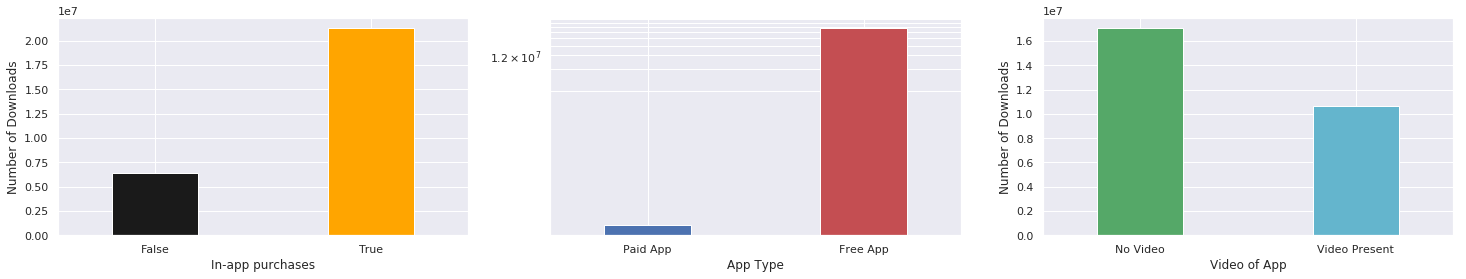

In [0]:
xtick_vals = ['Paid App','Free App']

fig = plt.figure(figsize=(25, 4))

ax1 = fig.add_subplot(131)

df1 = combined_df[['iap','no_of_downloads']]
p1 = df1.groupby(['iap'])['no_of_downloads'].sum().plot.bar(width=0.4,color=['k','orange'],ax=ax1)
p1.tick_params(labelrotation=0)
p1.yaxis.set_major_locator(MaxNLocator(integer=True))
p1.set_xlabel('In-app purchases')
p1.set_ylabel('Number of Downloads')
 


ax2 = fig.add_subplot(132)

df2 = combined_df[['free','no_of_downloads']]
p2 = df2.groupby(['free'])['no_of_downloads'].sum().plot.bar(width=0.4,logy=True,ax=ax2,color=['b','r'])
p2.tick_params(labelrotation=0)
p2.yaxis.set_major_locator(MaxNLocator(integer=True))
p2.set_xlabel('App Type')
p2.set_xticklabels(xtick_vals)


ax4 = fig.add_subplot(133)

df4 = copydf[['video','no_of_downloads']]
p3 = df4.groupby(['video'])['no_of_downloads'].sum().plot.bar(width=0.4,color=['g','c'],ax=ax4)
p3.tick_params(labelrotation=0)
p3.yaxis.set_major_locator(MaxNLocator(integer=True))
p3.set_xticklabels(['No Video','Video Present'])
p3.set_xlabel('Video of App')
p3.set_ylabel('Number of Downloads')


### Inference:

1. Having in-app purchases doesn't deter users from downloading an app.
2. Free apps are more likely to be downloaded. Because people are more likely to download Free apps, the free apps are also more likely to be attached to a review than the paid apps.
3. One might assume that having a video would enhance user's confidence in downloading the app, but it turns-out that apps without a video description are more heavily downloaded



### Do we prefer lighter over bulkier Apps?

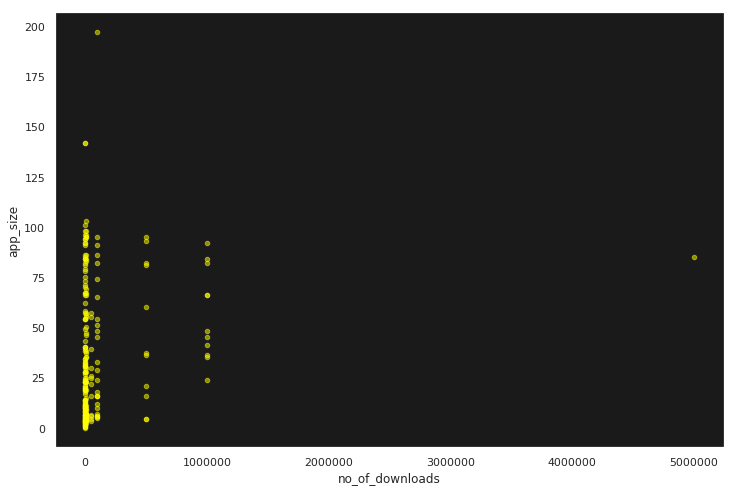

In [0]:
ax = combined_df.plot(kind='scatter', x='no_of_downloads', y='app_size', color='yellow', alpha=0.5)

# Specify background color for the axis/plot
ax.set_facecolor("k")
ax.grid(False)
 

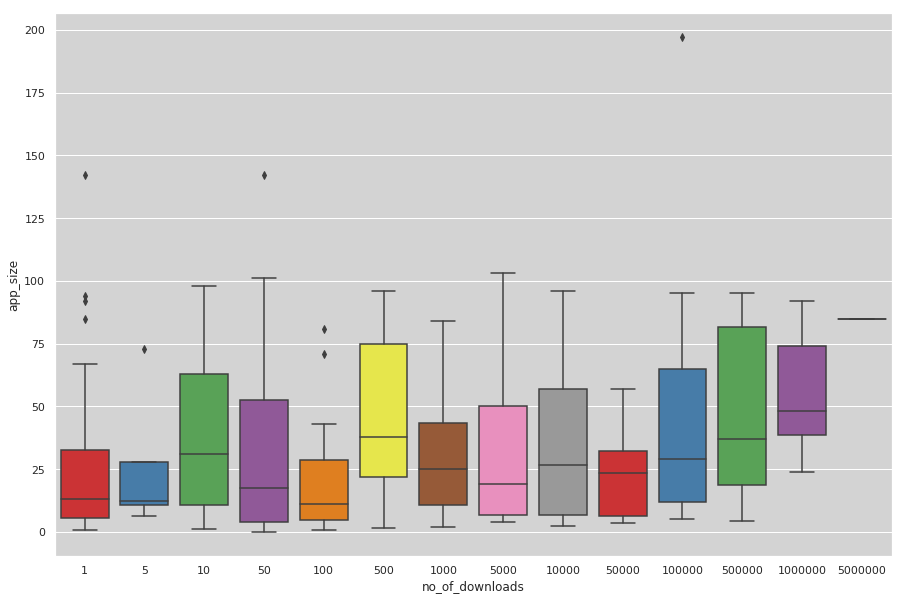

In [0]:
t1 = combined_df[['app_size','no_of_downloads']]
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="no_of_downloads", y="app_size", data=combined_df,palette="Set1")
ax.set_facecolor("lightgrey")


In [0]:
combined_df.query('no_of_downloads==5000000')

,app_id,category,content_rating,current_version,developer_address,developer_email,developer_id,developer_url,free,iap,iap_range,icon,no_of_downloads,interactive_elements,price,required_android_version,reviews,rating,app_size,title,updated,url,video,addr_english,location
6,com.outfit7.herodash,GAME_ACTION,[PEGI 3],1.0.16.517,Outfit7 Limited\nAgiou Georgiou\n4607 Pissouri\nCyprus,support@outfit7.com,5630538819012062144,http://outfit7.com/contact/android/,True,True,[In-Game Purchases],https://lh3.googleusercontent.com/NSzssTS605S-_IXjoMy-IQ8iOOkgrLMa5BRZwPMRjgMtdxRKwTleS_RJmuj6nA-XlC0,5000000,[In-Game Purchases],0.0,4.4 and up,41382,4.5,85.0,Talking Tom Hero Dash,"June 13, 2019",https://play.google.com/store/apps/details?id=com.outfit7.herodash&hl=en&gl=uk,None,Outfit7 Limited Agiou Georgiou 4607 Pissouri Cyprus,None


In [0]:
combined_df[['title','app_size','no_of_downloads','category']].where(combined_df.app_size>100).dropna()

,title,app_size,no_of_downloads,category
65,Warriors of Waterdeep,197.0,100000.0,GAME_ROLE_PLAYING
77,Clash of Kings 2: Rise of Dragons,103.0,5000.0,GAME_STRATEGY
153,LGV / HGV Lorry Theory Test UK,142.0,1.0,EDUCATION
195,COLOR OS - ICON PACK,101.0,50.0,PERSONALIZATION
226,Magic in your face,142.0,50.0,GAME_CARD


### We can conclude that Apps smaller than 100 MB in size are more frequently downloaded. However, some games are still very frequently downloaded despite being bulky(>100 MB). The biggest app is Warriors of Waterdeep , a role-play game.

# Price Variation within Categories

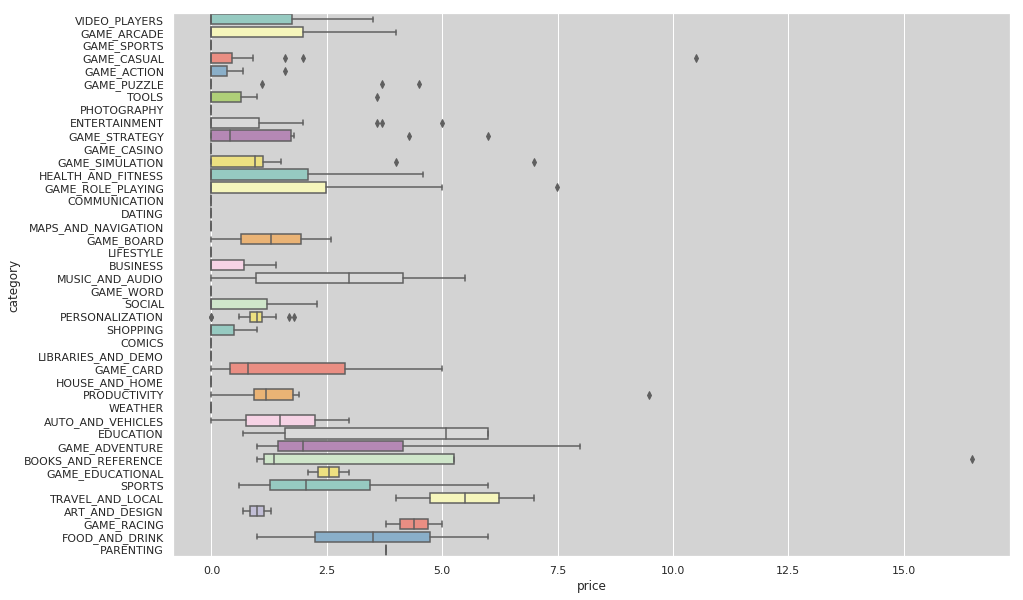

In [0]:
plt.figure(figsize=(15,10))
ax = sns.boxplot(x="price", y="category", data=combined_df,palette="Set3")
ax.set_facecolor("lightgrey")

In [0]:
combined_df[['title','app_size','no_of_downloads','category','rating','price']].where(combined_df.price>10).dropna()

,title,app_size,no_of_downloads,category,rating,price
167,기적의 분식집 Complete,23.0,1000.0,GAME_CASUAL,4.8,10.49


### Inference:

We observe that there is not much variability in price of the paid apps.  Most of them happen to be < £5. A few apps nearing £10, and two anomalies that are displayed above. The most expensive is a Game puzzle costing close to £50.

# How many of Free and Paid Apps in each Category ?


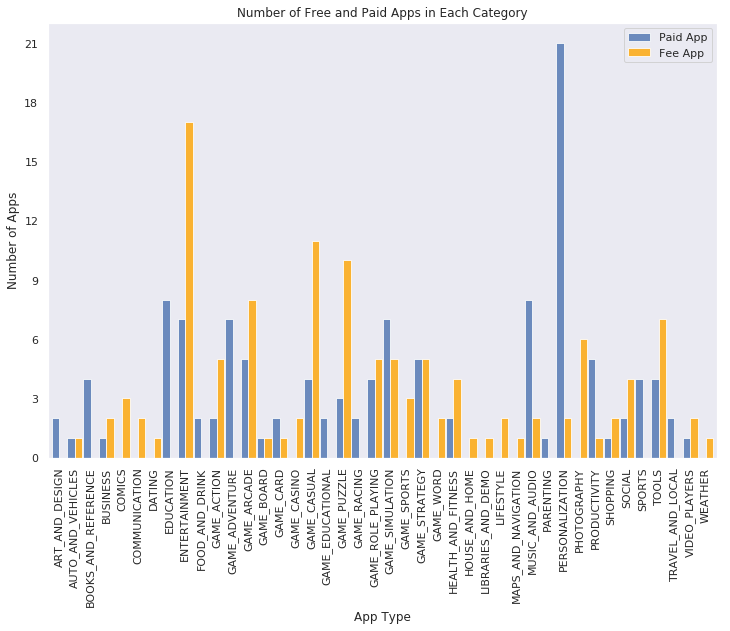

In [0]:
bar_color = ['b','orange']
bar_width = 0.95
g = combined_df.groupby(['free','category']).size().unstack(0).plot.bar(color=bar_color,width = 0.95,alpha=0.8)
g.yaxis.set_major_locator(MaxNLocator(integer=True))
g.set_xlabel('App Type')
g.set_ylabel('Number of Apps')
g.set_title('Number of Free and Paid Apps in Each Category')
g.legend(['Paid App','Fee App'])
g.grid(False)

### Inference:
Paid or Free, the trend is the similar. A popular category for free apps is also popular for paid apps with minute differences in count.

# Study variability of ratings of Apps in each category

In [0]:
l =combined_df.category.value_counts().index

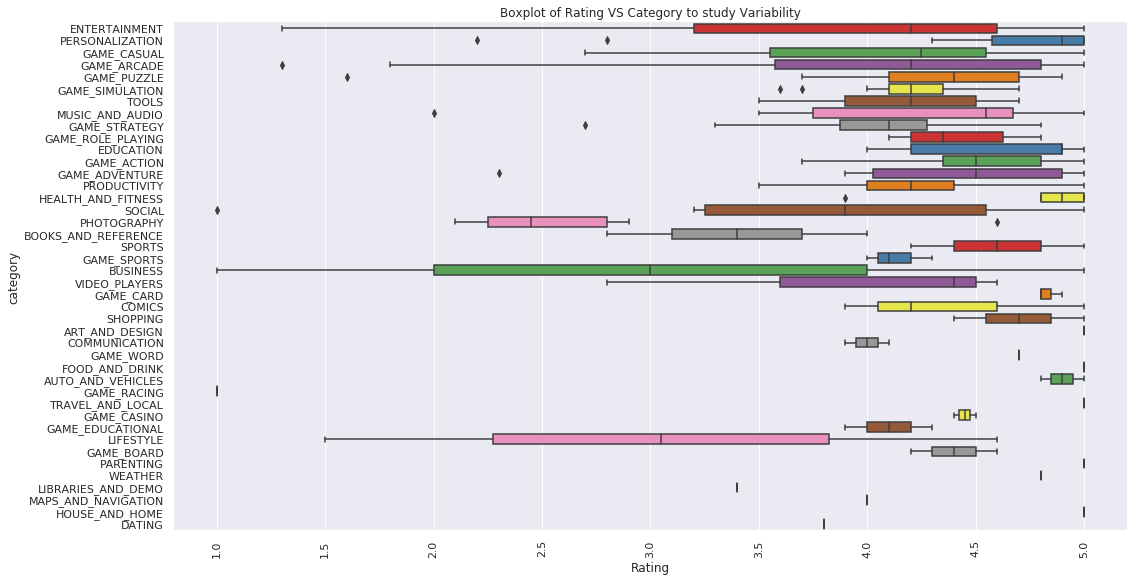

In [0]:
g = sns.catplot(y="category",x="rating",data=combined_df, kind="box", height=8, aspect=2,palette = "Set1",order = l,orient="h")

g.set_xticklabels(rotation=90)

g = g.set_xlabels("Rating")
plt.title('Boxplot of Rating VS Category to study Variability')
plt.show()

### Inference:

There is a lot of variability in ratings in each category. There are categories which have apps that are rating really how or really high. A contributing factor to this is that the number of apps in some categories is very low. Otherwise, most apps are rated above average.

# Visualize relationships and probability distributions

We ignore static variables, and the different categories. Considering the number of categories, even using different colors for them would induce confusion in analysis


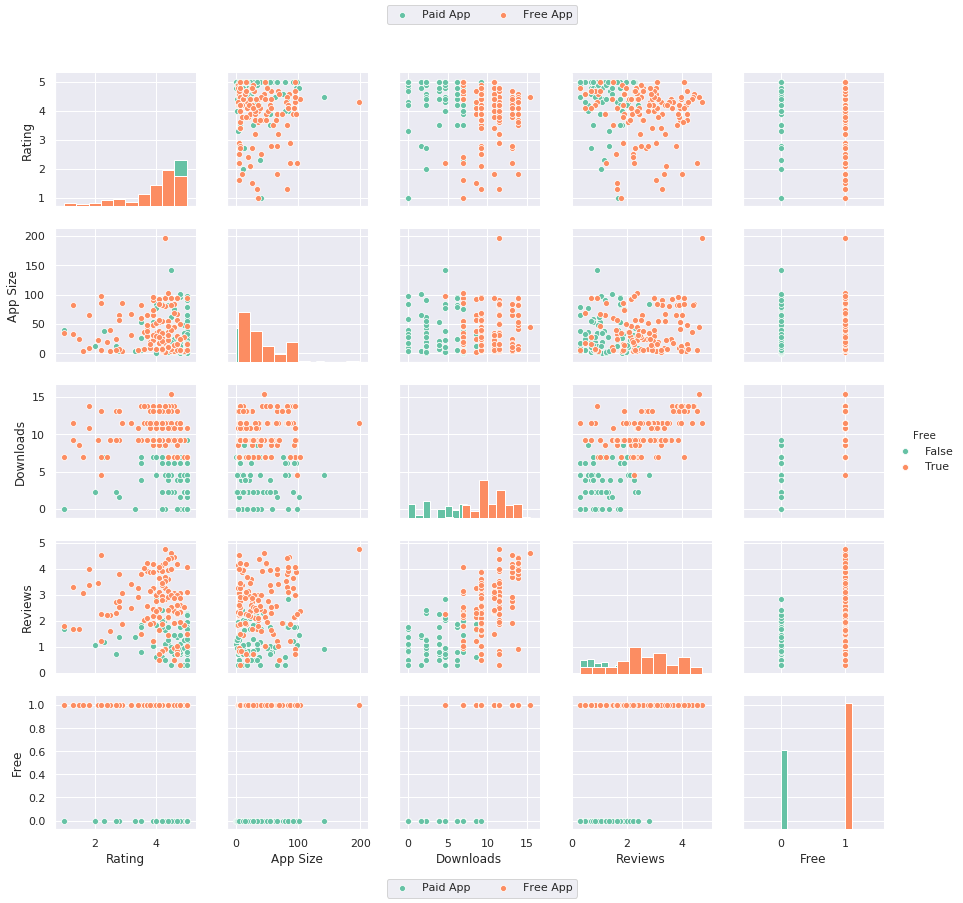

In [0]:
x = combined_df['rating'].dropna() 
y = combined_df['app_size'].dropna() 

z = combined_df['no_of_downloads'].where(combined_df.no_of_downloads!=0).dropna()
p = combined_df['reviews'].where(combined_df.reviews!=0).dropna()

f =  combined_df.free.dropna()

data = pd.DataFrame(list(zip(x, y, np.log(z), np.log10(p),f)),columns=['Rating','App Size', 'Downloads', 'Reviews', 'Free'])

g = sns.pairplot(data, hue='Free', diag_kind='hist',palette='Set2')
handles = g._legend_data.values()
#labels = g._legend_data.keys()
labels = ['Paid App','Free App']
g.fig.legend(handles=handles, labels=labels, loc='upper center', ncol=3)
g.fig.legend(handles=handles, labels=labels, loc='lower center', ncol=3)

g.fig.subplots_adjust(top=0.92, bottom=0.08)

### Inference:

1. Diagonal histograms show us the marginal distributions of the paid and free app categories.
2. Joint distributions are shown above and below the diagonals(in the triangular regions). Upper triangle is  a mirror image of the lower triangle.
3. Variability in ratings is much greater in free apps than in Paid apps. Paid apps are mostly, above average rated apps.
4. Excepting a few outliers, the app sizes for both free and paid apps are in the same range(<100MB).
5. Free apps are more frequently downloaded than Paid apps.
6. Free apps seems to have a higher number of reviews than paid apps, probably because they're more likely to be downloaded than the paid ones.


# Most Popular Category

In [0]:
dfx = combined_df[['no_of_downloads','category']]
dfxgroup = dfx.groupby(['category'])['no_of_downloads'].sum().sort_values( ascending=False)


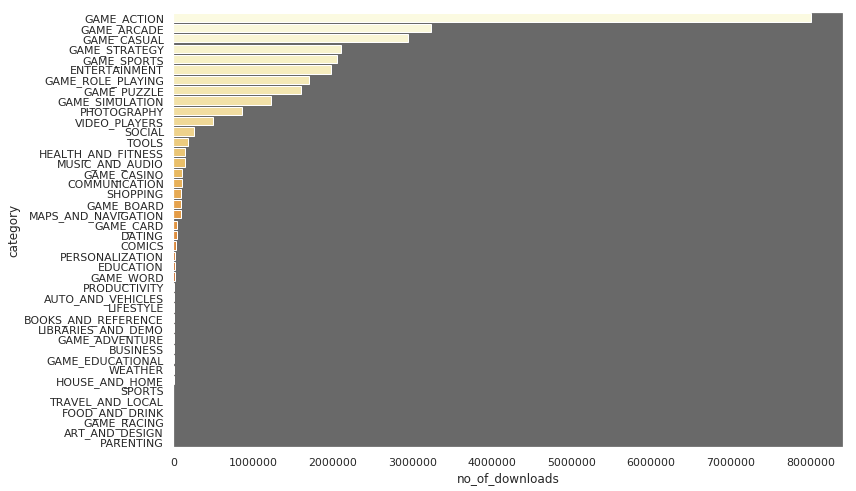

In [0]:
ax = sns.barplot(x=dfxgroup.values, y=dfxgroup.index,palette = sns.color_palette("YlOrBr", 40))
ax.set_facecolor("dimgrey")
ax.set_xlabel("no_of_downloads")
ax.grid(False)

The chart above lets us concretely conclude that users mostly download Games of different types, and entertainment apps mostly because the they comprise the TOP 10 most downloaded apps.

# Content Rating

In [0]:
test_df =  combined_df.copy()


In [0]:
combined_df.head()

,app_id,category,content_rating,current_version,developer_address,developer_email,developer_id,developer_url,free,iap,iap_range,icon,no_of_downloads,interactive_elements,price,required_android_version,reviews,rating,app_size,title,updated,url,video,addr_english,location
0,com.lime.video.player,VIDEO_PLAYERS,[PEGI 3],1.0.2,None,ndrvarenik@gmail.com,Lime+Player+Team,https://docs.google.com/document/d/e/2PACX-1vSKwOBfDkq0Bkm_03hUW8D_ZCT0OpDrsLiQTfg0zXXNii36Kig9PM1XIu0LJM0s99DhAhNLIb9v0TXO/pub,True,False,None,https://lh3.googleusercontent.com/AqC2ZnukYpBwJuN3mda68k3VAneirI9dmYaoD_Eb7uSF8BBBaKbPetEE__ekB-QQtla6,500000,None,0.0,4.1 and up,6327,2.8,NaN,Lime Player,"June 8, 2019",https://play.google.com/store/apps/details?id=com.lime.video.player&hl=en&gl=uk,None,None,None
1,com.kwalee.jetpackjump,GAME_ARCADE,[PEGI 3],1.2.2,Kwalee Ltd\nJuno Drive\nLeamington Spa\nWarwickshire\nCV31 3RG,jetpacksupport@kwalee.com,5095490389686529219,http://www.kwalee.com,True,True,[In-Game Purchases],https://lh3.googleusercontent.com/czEuKYanvc187Ok-TlCsluGMXvbaw8JGZ0BbzbuKKcxMujcc9K27Q2w9i78ZR1Pxmw,1000000,[In-Game Purchases],0.0,4.4W and up,15922,3.9,66.0,Jetpack Jump,"June 10, 2019",https://play.google.com/store/apps/details?id=com.kwalee.jetpackjump&hl=en&gl=uk,None,Kwalee Ltd Juno Drive Leamington Spa Warwickshire CV31 3RG,None
2,com.h8games.blocksbuster,GAME_ARCADE,[PEGI 3],3,"82 Rue du Faubourg Saint Martin, 75010 Paris",support@voodoo.io,VOODOO,http://www.voodoo.io,True,False,None,https://lh3.googleusercontent.com/GrUamG5s8Qxr36VMAGgM_Mz23xSatTiwMiho8oAhlMwt-mdIfNUmouBSFufrTn_FtVRk,1000000,None,0.0,4.4 and up,8587,3.7,48.0,Blocksbuster!,"May 18, 2019",https://play.google.com/store/apps/details?id=com.h8games.blocksbuster&hl=en&gl=uk,None,"82 Rue du Faubourg Saint Martin, 75010 Paris",None
3,com.levelzed.waterjump,GAME_SPORTS,"[PEGI 12, Moderate Violence]",1.4.4,"82 Rue du Faubourg Saint Martin, 75010 Paris",support@voodoo.io,VOODOO,http://voodoo.io,True,True,"[PEGI 12, Moderate Violence]",https://lh3.googleusercontent.com/ff4Ojxq-GkfXt-VNB0c9G0FPw_oTRCm80SvoaHUheqCbx2G6NTdrZ6ssqGj1JwlGuro,1000000,None,0.0,4.4 and up,4298,4.1,41.0,Purple Diver,"June 12, 2019",https://play.google.com/store/apps/details?id=com.levelzed.waterjump&hl=en&gl=uk,None,"82 Rue du Faubourg Saint Martin, 75010 Paris",None
4,com.bigfishgames.toystorydropgoog,GAME_CASUAL,[PEGI 3],1.1.1,"906 Alaskan Way\nSeattle, WA 98104\nUnited States of America",info@bigfishgames.com,8355317828905497231,https://www.bigfishgames.com/game/toy-story-drop,True,True,[Digital Purchases],https://lh3.googleusercontent.com/zu4n4GUqaH15RA1mqJAD-SztU3FdMyllf1l9hnQE2cBxEhV4ecCsssunOuBxlgtL0Rk,1000000,[Digital Purchases],0.0,5.0 and up,27490,4.6,92.0,Toy Story Drop!,"May 23, 2019",https://play.google.com/store/apps/details?id=com.bigfishgames.toystorydropgoog&hl=en&gl=uk,https://www.youtube.com/embed/qlZ63qMl7kM,"906 Alaskan Way Seattle, WA 98104 United States of America",None


In [0]:
cols = []

In [0]:
for index, row in combined_df.iterrows():
  for e in row.content_rating:
    if e not in cols:
      cols.append(e) 

In [0]:
for c in cols:
 
  test_df[c] = 0

In [0]:
for i, rrows in test_df.iterrows():
  for e in rrows.content_rating:
 
    test_df.at[i,e] =1
 
 

In [0]:
sum_dict={}
for c in cols:
  if c not in sum_dict:
    sum_dict[c] = test_df[c].sum()

In [0]:
sum_dict_sorted = {k: v for k, v in sorted(sum_dict.items(), key=lambda x: x[1])}

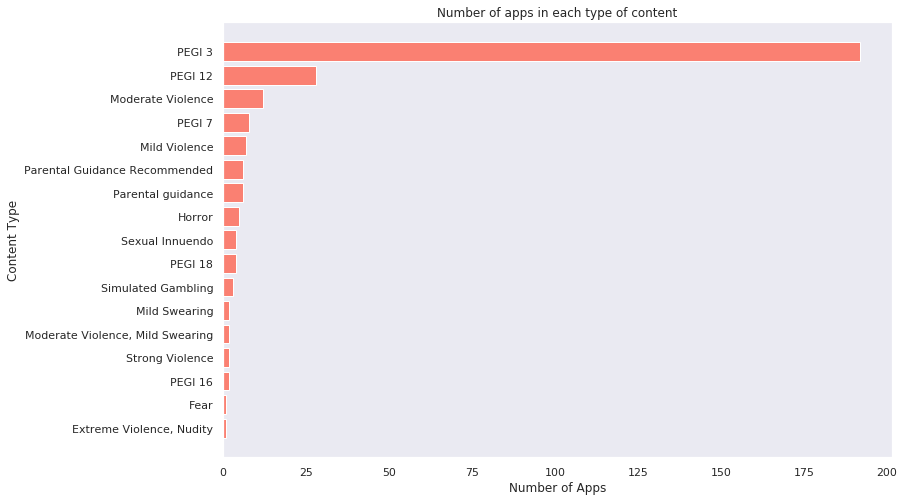

In [0]:
plt.barh( range(len(sum_dict_sorted)),list(sum_dict_sorted.values()), align='center',color='salmon')
plt.yticks(range(len(sum_dict_sorted)), list(sum_dict_sorted.keys()))
plt.grid(False)
plt.title("Number of apps in each type of content")
plt.ylabel("Content Type")
plt.xlabel("Number of Apps")
plt.show()

There are very few apps that comprise of content we need to be concerened about. Although they exist, do they attract users?

In [0]:
sumdownload_dict={}
for c in cols:
  if c not in sumdownload_dict:
    sumdownload_dict[c] = test_df['no_of_downloads'].where(test_df[c]==1).sum()

In [0]:
sumdownload_dict_sorted = {k: v for k, v in sorted(sumdownload_dict.items(), key=lambda x: x[1])}

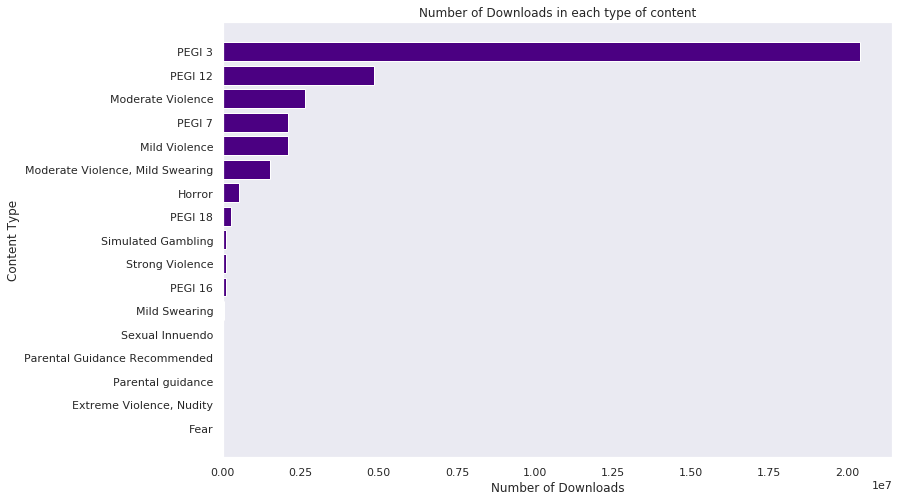

In [0]:
plt.barh( range(len(sumdownload_dict_sorted)),list(sumdownload_dict_sorted.values()), align='center',color='indigo')
plt.yticks(range(len(sumdownload_dict_sorted)), list(sumdownload_dict_sorted.keys()))
plt.grid(False)
plt.title("Number of Downloads in each type of content")
plt.ylabel("Content Type")
plt.xlabel("Number of Downloads")
plt.show()

### Thankfully, the number of downloads of apps comprising questionable content is negligible or entirely null.

# Futher Analysis Ideas:


Some possible improvements to current EDA:


1. Subject to the availability of actual reviews and description of the apps, we can detect sentiment of the reviews, the kind of words used in the description that influence users to download the app, etc.

2. The current data has a URL to the icon and video. We can analyze the image to understand what may draw users into downloading it, for example any specific colors or designs used etc.



In [0]:
data.columns

Index(['Rating', 'App Size', 'Downloads', 'Reviews', 'Free'], dtype='object')

In [0]:
combined_df.corr()

,free,iap,no_of_downloads,price,reviews,rating,app_size
free,1.000000,0.354599,0.288474,-0.618777,0.308963,-0.282399,0.073569
iap,0.354599,1.000000,0.319854,-0.262331,0.394944,0.042861,0.424993
no_of_downloads,0.288474,0.319854,1.000000,-0.178641,0.651798,-0.072027,0.180536
price,-0.618777,-0.262331,-0.178641,1.000000,-0.190251,0.206073,-0.007167
reviews,0.308963,0.394944,0.651798,-0.190251,1.000000,0.017346,0.379351
rating,-0.282399,0.042861,-0.072027,0.206073,0.017346,1.000000,0.117703
app_size,0.073569,0.424993,0.180536,-0.007167,0.379351,0.117703,1.000000


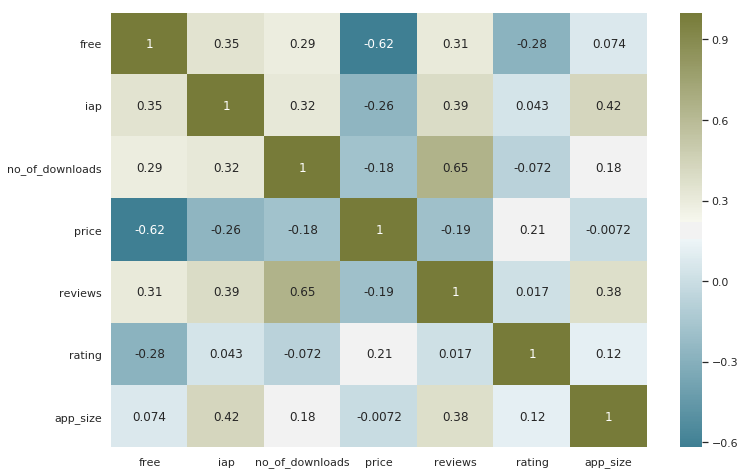

In [0]:
p =sns.heatmap(combined_df.corr(), annot=True, cmap=sns.diverging_palette(220, 90, as_cmap=True))

In [0]:
import pandas_profiling 

pandas_profiling.ProfileReport(combined_df)

Number of variables,25
Number of observations,240
Total Missing (%),11.3%
Total size in memory,43.7 KiB
Average record size in memory,186.3 B
Numeric,5
Categorical,10
Boolean,2
Date,0
Text (Unique),4
Rejected,1


In [0]:
combined_df.query('rating<2')

,app_id,category,content_rating,current_version,developer_address,developer_email,developer_id,developer_url,free,iap,iap_range,icon,no_of_downloads,interactive_elements,price,required_android_version,reviews,rating,app_size,title,updated,url,video,addr_english,location
5,com.aqua.slide,GAME_ARCADE,[PEGI 3],1.0.7,None,xahitbayri@gmail.com,Xahit+Game+Studio,https://www.dropbox.com/s/iyrtv8181kympqe/Slideio.docx?dl=0,True,True,[PEGI 3],https://lh3.googleusercontent.com/j1DKva6LTm5TEcDl-1jWKPy4rf2fSkL4K4WCzyNyY7-OEsTwxkY7kcDU7oLIzUnMfu4,1000000,None,0.00,4.1 and up,10152,1.8,NaN,Waterpark Slide.io,"June 8, 2019",https://play.google.com/store/apps/details?id=com.aqua.slide&hl=en&gl=uk,None,None,None
14,com.vzone.gzone,ENTERTAINMENT,[PEGI 3],1.1,None,ms8130102@gmail.com,sp087,https://www.dropbox.com/s/ooot3oums4m2jhb/privacypolicy.docx?dl=0,True,False,None,https://lh3.googleusercontent.com/CoGIUFrs6XICm36eciK2WkZdhnlB2_Z-7I7qq8w7otUmTFsmgDYlZ2W73-stzrKsJHA,10000,None,0.00,4.1 and up,46,1.3,4.400,Mobizone,"May 30, 2019",https://play.google.com/store/apps/details?id=com.vzone.gzone&hl=en&gl=uk,None,None,None
27,com.simjdhd.siurykahs,GAME_ARCADE,[PEGI 3],0.2,None,sukhpreet2015515@gmail.com,8756215594295817389,http://simmu.online/,True,False,None,https://lh3.googleusercontent.com/3OwkqMfWevPPY072F7WOpHcCFO6OtrsKvZc6i7MQLcKfNIPPQKAWJt8znW1EDn4CvjEJ,100000,None,0.00,4.1 and up,1952,1.3,10.000,Slide.io,"June 6, 2019",https://play.google.com/store/apps/details?id=com.simjdhd.siurykahs&hl=en&gl=uk,None,None,None
59,com.lanmimic.mimicat.v1,LIFESTYLE,"[Parental guidance, Parental Guidance Recommended]",1.1,None,art.l.e.v.production@gmail.com,RiK+International+Company,https://docs.google.com/document/d/e/2PACX-1vQDsXXkkwmw2eqE9-vaoieekPS6yU5fzkczUKgWvPksI22F4iylkNJmkUSs1aag3ivYmDrc_TZFSNNN/pub,True,False,None,https://lh3.googleusercontent.com/50R_BYgVBAY32zmf37zFYWuG2abLZrKRT1vJX7nDpTJB06AgI2s4DsxTfy3PqXsogCI,5000,[Users Interact],0.00,4.1 and up,8,1.5,4.000,Mimicat,"June 10, 2019",https://play.google.com/store/apps/details?id=com.lanmimic.mimicat.v1&hl=en&gl=uk,None,None,None
67,at.intros.cogx,BUSINESS,"[Parental guidance, Parental Guidance Recommended]",1.1.84,None,mobilebuild@intros.at,Grip+-+Event+Networking+Platform,https://www.grip.events,True,False,None,https://lh3.googleusercontent.com/Bufeq26-7_mzIiVwz2JhvVoVCvLLhkKkeIFYmiO9H4gEbcXhC9ppBAI4WDmqXhwatQ,1000,[Users Interact],0.00,5.0 and up,3,1.0,40.000,CogX 2019,"May 21, 2019",https://play.google.com/store/apps/details?id=at.intros.cogx&hl=en&gl=uk,None,None,None
70,com.mygamemania.gamesmania,GAME_PUZZLE,[PEGI 3],1.0,None,radi7178803223@gmail.com,interf,https://www.dropbox.com/s/9incnyh8vkxm8zu/privacypolicy.docx?dl=0,True,False,None,https://lh3.googleusercontent.com/2YoJ53Gw59LWhSuy-IEKieRCIXpuMttodIbtKLMf094OlDFUN8AAytxSpcpFFTiYVg,1000,None,0.00,4.0.3 and up,7,1.6,18.000,Games Mania,"May 29, 2019",https://play.google.com/store/apps/details?id=com.mygamemania.gamesmania&hl=en&gl=uk,None,None,None
99,com.yellowrow.picture.photo,ENTERTAINMENT,[PEGI 3],1.5,None,Hiltonfhbsi@gmail.com,Skycooler+Dev,https://sites.google.com/view/backgroundcutout2019/home,True,False,None,https://lh3.googleusercontent.com/_yVvFsR-ogrK3RJ0DbRXlK5KVbWFrG4viyDOhFuun-3pq3leh47ubZSEaKe0D6Abgw,100000,None,0.00,4.4 and up,766,1.8,6.100,Background Cut Out 2019,"June 12, 2019",https://play.google.com/store/apps/details?id=com.yellowrow.picture.photo&hl=en&gl=uk,None,None,None
185,zgames.dirt.track.racing,GAME_RACING,[PEGI 3],1.0,göktürk merkez mah. istanbul cad. no : 2 su venue sitesi eyüp istanbul,infozgamestudios@gmail.com,Z+Game+Studios,https://www.facebook.com/zgamesstudio/,False,False,None,https://lh3.googleusercontent.com/p1oHXu9Mebf9psnH8rAVMBnjGC-NZK-zDwwl32eih7xPuyB1UfAAvVmQxiFSc7dvY_0,10,None,3.79,4.1 and up,0,1.0,66.000,Outlaws - Dirt Track Racing,"May 25, 2019",https://play.google.com/store/apps/details?id=zgames.dirt.track.racing&hl=en&gl=uk,https://www.youtube.com/embed/hQVCtKPV2v0,Göktürk Merkez Mah. ist

In [0]:
X =  test_df.copy()

In [0]:
X.interactive_elements

0      None                                                
1      [In-Game Purchases]                                 
2      None                                                
3      None                                                
4      [Digital Purchases]                                 
5      None                                                
6      [In-Game Purchases]                                 
7      [Users Interact, In-Game Purchases]                 
8      [In-Game Purchases]                                 
9      None                                                
10     [In-Game Purchases]                                 
11     None                                                
12     [In-App Purchases]                                  
13     [In-Game Purchases]                                 
14     None                                                
15     None                                                
16     None                             